# Overview

Learning note of Sam's article [Visualizing Embedding Vectors](https://medium.com/@gallaghersam95/visualizing-embedding-vectors-99cac1d164c4).

In [1]:
!pip install -U -q sentence-transformers==3.0.1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

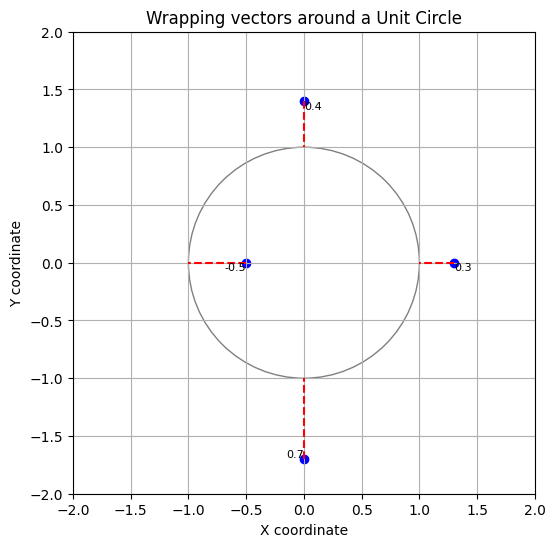

In [3]:
# Plotting the above example around a unit circle.
numbers = [0.3, 0.4, -0.5, 0.7]
N = len(numbers)

# Calculate the angles around the circle for N points
angles = np.linspace(0, 2 * np.pi, N, endpoint=False)

# Calculate the points in relation to the unit circle
radii = 1 + np.array(numbers)
x = radii * np.cos(angles)
y = radii * np.sin(angles)

# Calculate points on the circle so we can draw lines back to the circumference
circle_x = np.cos(angles)
circle_y = np.sin(angles)

# Plot the circle and points
plt.figure(figsize=(6, 6))
circle = plt.Circle((0, 0), 1, edgecolor='gray', facecolor='none')
ax = plt.gca()
ax.add_artist(circle)
ax.scatter(x, y, color='b')

# Draw lines from each vector point back to the circle
for px, py, cx, cy in zip(x, y, circle_x, circle_y):
    ax.plot([px, cx], [py, cy], 'red', linestyle='--')

# Add labels for the vector points
for i, (xi, yi) in enumerate(zip(x, y)):
    ax.text(xi, yi, f'{numbers[i]}', fontsize=8, ha='right' if xi < 0 else 'left', va='bottom' if yi < 0 else 'top')

# Set limits and aspect
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')
ax.grid(True)

# Set Title
plt.title('Wrapping vectors around a Unit Circle')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()

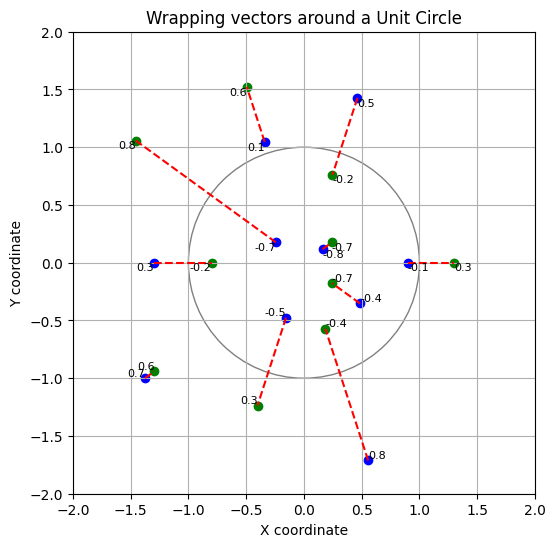

In [4]:
# Generalizing the above into a convenience function

def plot_vectors(v1, v2, title, show_labels=False, normalize=False):
    # Normalize the data if required (along maximum)
    if normalize:
        max_value = max(max(v1), max(v2))
        v1 = [x / max_value for x in v1]
        v2 = [x / max_value for x in v2]

    # We must assume both vectors are the same length
    N = len(v1)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False)

    # Calculate the points in relation to the circle
    radii_1 = 1 + np.array(v1)
    x_1 = radii_1 * np.cos(angles)
    y_1 = radii_1 * np.sin(angles)

    radii_2 = 1 + np.array(v2)
    x_2 = radii_2 * np.cos(angles)
    y_2 = radii_2 * np.sin(angles)

    # Plot the circle and points
    plt.figure(figsize=(6, 6))
    circle = plt.Circle((0, 0), 1, edgecolor='gray', facecolor='none')
    ax = plt.gca()
    ax.add_artist(circle)
    ax.scatter(x_1, y_1, color='b') # Plotting v1
    ax.scatter(x_2, y_2, color='g') # Plotting v2

    # Draw lines between v1 and v2
    for px, py, tx, ty in zip(x_1, y_1, x_2, y_2):
        ax.plot([px, tx], [py, ty], 'red', linestyle='--')

    # Optionally write labels
    if show_labels:
        for i, (xi, yi) in enumerate(zip(x_1, y_1)):
            ax.text(xi, yi, f'{v1[i]}', fontsize=8, ha='right' if xi < 0 else 'left', va='bottom' if yi < 0 else 'top')
        for i, (xi, yi) in enumerate(zip(x_2, y_2)):
            ax.text(xi, yi, f'{v2[i]}', fontsize=8, ha='right' if xi < 0 else 'left', va='bottom' if yi < 0 else 'top')

    # Set limits and aspect
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal')
    ax.grid(True)

    # Set Title
    plt.title(title)
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.show()
    
v1 = [-0.1, -0.8, 0.5, 0.1, -0.7,  0.3, 0.7, -0.5,  0.8, -0.4]
v2 = [ 0.3, -0.7, -0.2, 0.6, 0.8, -0.2, 0.6,  0.3, -0.4, -0.7]

plot_vectors(v1, v2, "Wrapping vectors around a Unit Circle", show_labels=True)

# Comparing embedding vectors

In [5]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-MiniLM-L6-v2")

/opt/conda/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [6]:
model.to("cuda")

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

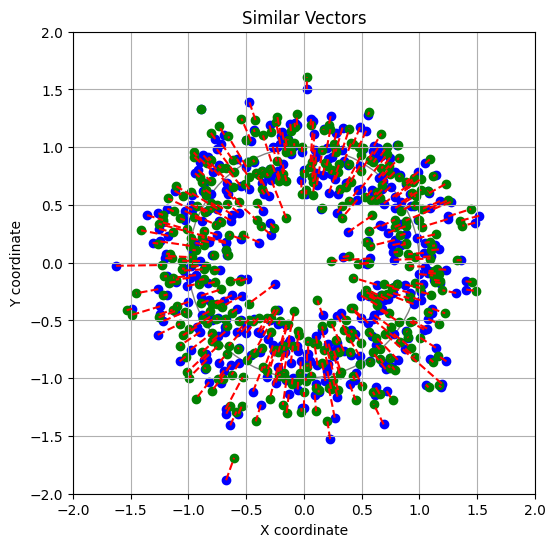

In [7]:
# Build embedding vectors for two similar phrases
v1 = model.encode("Do you think we should have pasta or pizza for dinner?").tolist()
v2 = model.encode("I think we should order a pizza for dinner.").tolist()

# Plot the vectors
plot_vectors(v1, v2, "Similar Vectors", normalize=True)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

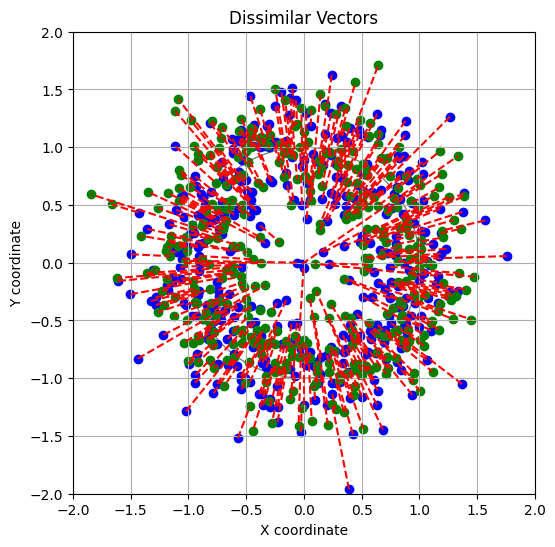

In [8]:
# Build embedding vectors for two dissimilar phrases
v1 = model.encode("I hope the weather is nice today so I can go to the park later.").tolist()
v2 = model.encode("Working in higher dimensions of math can seem a bit intimidating.").tolist()

# Plot the vectors
plot_vectors(v1, v2, "Dissimilar Vectors", normalize=True)

# Acknowledgements

* https://medium.com/@gallaghersam95/visualizing-embedding-vectors-99cac1d164c4